In [1]:
import re

def process_line(output):
    energy = []
    sign = []

    for line in pattern.split(str(stdout)):

        pat = "Total Energy"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.split("+-")
            energy = [float(line[0]), float(line[1])]


        pat = "average sign"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.split("+-")
            sign = [float(line[0]), float(line[1])]
    return energy, sign

In [2]:
import os
os.chdir("/Users/keisukemurota/Documents/todo/worms/build")

# original shastry-surtherland model

In [50]:
import subprocess


out = subprocess.Popen(["./debug", "-L", "2", "-T", "1", "-H", "0", "-D", "1" ,"-m", "10000", "-n", "1000000", "-M", "shastry"], 
           stdout=subprocess.PIPE, 
           stderr=subprocess.STDOUT)
stdout,stderr = out.communicate()
# print(stdout)

### sampling energies for several temperature

In [74]:
energy_array = []
sign_array = []
T =  np.logspace(-1, 1, num=50)
for t in T:
    out = subprocess.Popen(["./debug", "-L", "2", "-T", "{:.2f}".format(t), "-H", "0", "-D", "1" ,"-m", "10000", "-n", "100000", "-M", "shastry"], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign = process_line(stdout)
#     print(f"T = {t}",energy)
    energy_array.append(energy)
    sign_array.append(sign)

T = 0.1 [-12.0006, 5.56865]
T = 0.10985411419875583 [-10.5209, 14.1359]
T = 0.12067926406393285 [-10.9, 116.558]
T = 0.13257113655901093 [-33.5331, 196.094]
T = 0.14563484775012436 [-12.4169, 17.772]
T = 0.15998587196060582 [-8.59102, 25.1674]
T = 0.1757510624854792 [-15.3456, 14.594]
T = 0.193069772888325 [-50.4086, 1176.1]
T = 0.21209508879201905 [-17.1525, 94.6218]
T = 0.2329951810515372 [178.47, 14147.2]
T = 0.2559547922699536 [-12.968, 6.00332]
T = 0.281176869797423 [-13.2688, 17.9821]
T = 0.3088843596477481 [5.54421, 118.564]
T = 0.3393221771895328 [-11.3176, 9.92646]
T = 0.372759372031494 [-10.9113, 15.8774]
T = 0.4094915062380424 [-12.4578, 23.0806]
T = 0.44984326689694454 [-9.98125, 13.0364]
T = 0.49417133613238345 [-4.97989, 7.00473]
T = 0.5428675439323859 [-7.09039, 5.11921]
T = 0.5963623316594643 [-6.23197, 2.35208]
T = 0.6551285568595507 [-7.63715, 0.998878]
T = 0.7196856730011519 [-6.73648, 0.617957]
T = 0.7906043210907697 [-6.13611, 0.338994]
T = 0.8685113737513525 [-5.9

In [142]:
energy_array = np.array(energy_array)
sign_array = np.array(sign_array)

## calculate exact value

In [4]:
import numpy as np
E = np.load("../doc/data/shastry_exact.npy")
tmp = np.einsum("i,j->ij",-1/np.logspace(-1, 1, num=50), E)
energy_exact = np.einsum("j,ij->i",E,np.exp(tmp))/np.einsum("ij->i", np.exp(tmp))

In [5]:
T = 1
beta = 1/T
np.sum(E * np.exp(-beta*E))/np.sum(np.exp(-beta*E))

-5.585519722674071

### plot together with exact value

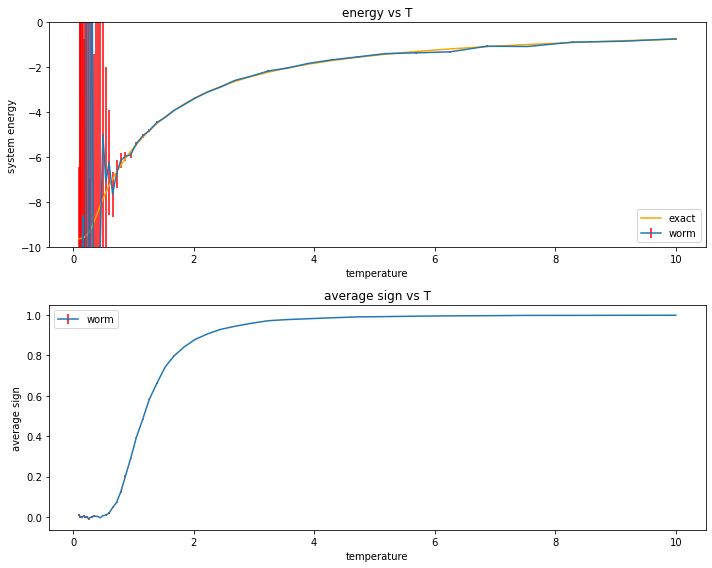

In [159]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,8))
 
# add_subplot(L, M, N)形式
ax1 = fig.add_subplot(2,1,1)

ax1.errorbar(T[0:],energy_array[0:,0], yerr = energy_array[0:,1], ecolor='red', label='worm')
ax1.plot(T[0:],energy_exact, color='orange',label = 'exact')
ax1.set_title('energy vs T')
ax1.set_xlabel('temperature')
ax1.set_ylabel('system energy')
ax1.set_ylim(-10, 0)
ax1.legend()


ax1 = fig.add_subplot(2,1,2)
ax1.errorbar(T[0:],sign_array[0:,0], yerr = sign_array[0:,1], ecolor='red',label='worm')
ax1.set_title('average sign vs T')
ax1.set_xlabel('temperature')
ax1.set_ylabel('average sign')
ax1.legend()

plt.tight_layout()

plt.show()

# unitary transformed shastry-surtherland model